# BigMart Sales Prediction - EDA Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

/opt/anaconda3/envs/V3_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load data
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (8523, 12)
Test data shape: (5681, 11)


In [3]:
# Basic data info
print("Training Data Info:")
print(train_data.info())
print("\nFirst 5 rows:")
print(train_data.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

First 5 rows:
  Ite

In [4]:
# Missing values analysis
print("Missing values in training data:")
missing_train = train_data.isnull().sum()
print(missing_train[missing_train > 0])

print("\nMissing values in test data:")
missing_test = test_data.isnull().sum()
print(missing_test[missing_test > 0])

Missing values in training data:
Item_Weight    1463
Outlet_Size    2410
dtype: int64

Missing values in test data:
Item_Weight     976
Outlet_Size    1606
dtype: int64


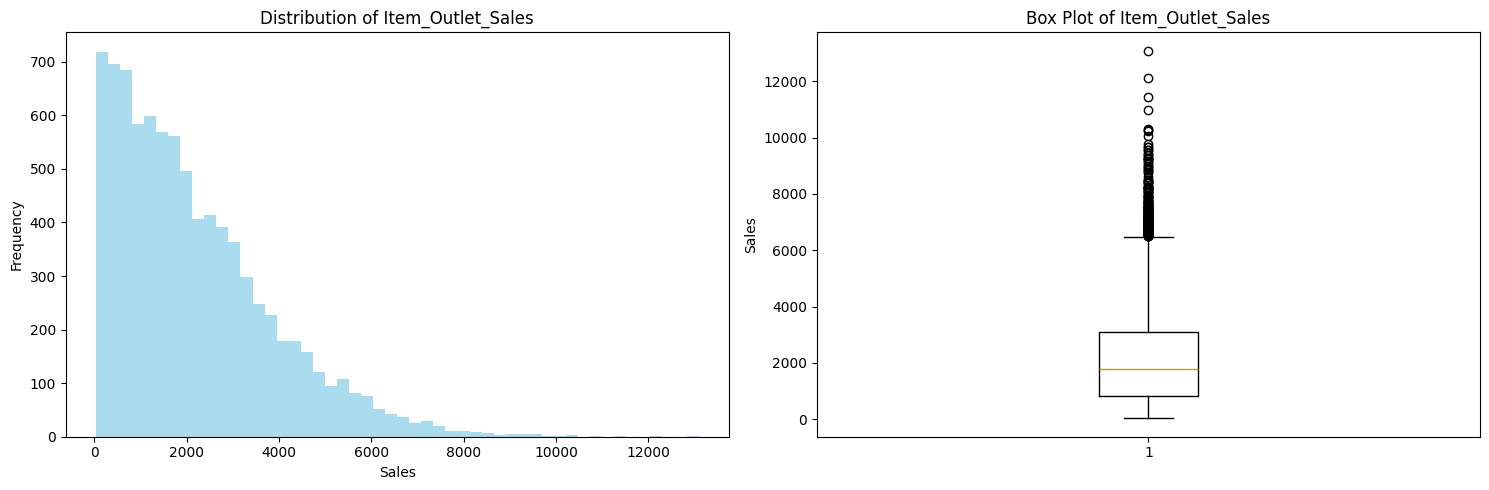

Sales statistics:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


In [5]:
# Target variable analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution
axes[0].hist(train_data['Item_Outlet_Sales'], bins=50, alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Item_Outlet_Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(train_data['Item_Outlet_Sales'])
axes[1].set_title('Box Plot of Item_Outlet_Sales')
axes[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

print(f"Sales statistics:")
print(train_data['Item_Outlet_Sales'].describe())

Item Type distribution:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


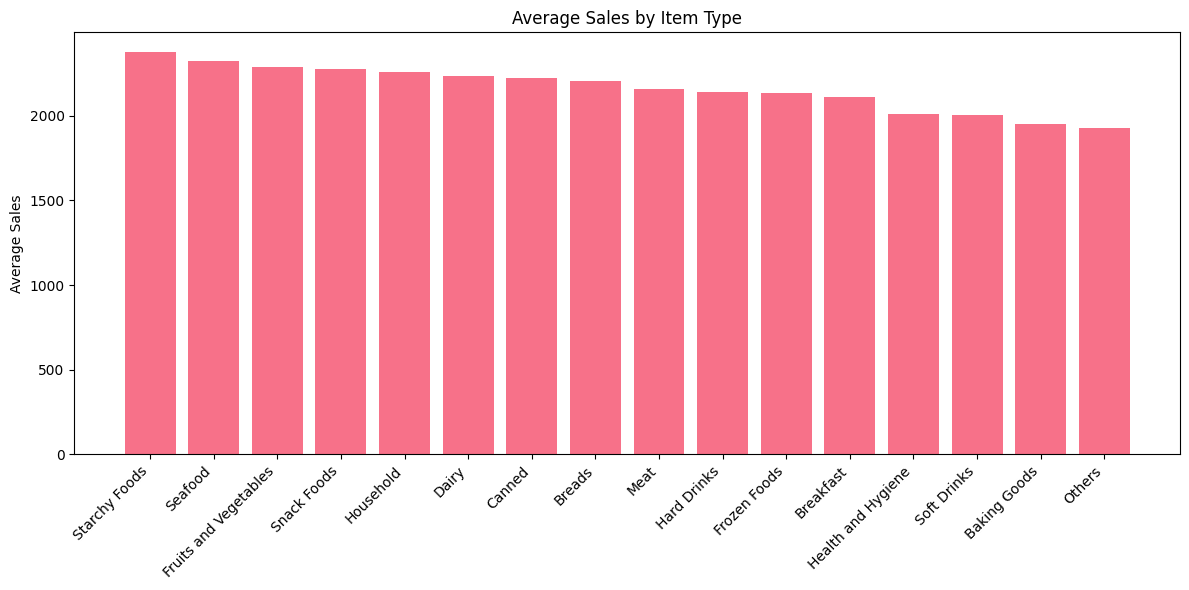

In [6]:
# Item analysis
print("Item Type distribution:")
item_type_counts = train_data['Item_Type'].value_counts()
print(item_type_counts)

# Plot item type vs sales
plt.figure(figsize=(12, 6))
item_sales = train_data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
plt.bar(range(len(item_sales)), item_sales.values)
plt.xticks(range(len(item_sales)), item_sales.index, rotation=45, ha='right')
plt.title('Average Sales by Item Type')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

In [7]:
# Fat content analysis
print("Item Fat Content distribution:")
fat_content_counts = train_data['Item_Fat_Content'].value_counts()
print(fat_content_counts)

# Standardize fat content values
fat_content_mapping = {
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'LOW FAT': 'Low Fat',
    'reg': 'Regular',
    'REGULAR': 'Regular'
}

train_data['Item_Fat_Content_Clean'] = train_data['Item_Fat_Content'].replace(fat_content_mapping)
print("\nCleaned Fat Content distribution:")
print(train_data['Item_Fat_Content_Clean'].value_counts())

Item Fat Content distribution:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Cleaned Fat Content distribution:
Item_Fat_Content_Clean
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Item Visibility statistics:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Items with zero visibility: 526 (6.17%)


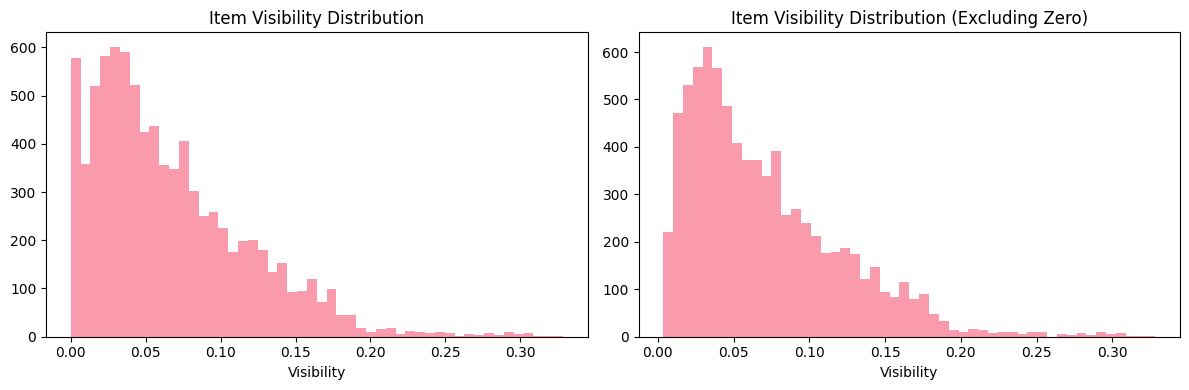

In [8]:
# Item visibility analysis
print("Item Visibility statistics:")
print(train_data['Item_Visibility'].describe())

# Check zero visibility
zero_visibility = (train_data['Item_Visibility'] == 0).sum()
print(f"\nItems with zero visibility: {zero_visibility} ({zero_visibility/len(train_data)*100:.2f}%)")

# Plot visibility distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(train_data['Item_Visibility'], bins=50, alpha=0.7)
plt.title('Item Visibility Distribution')
plt.xlabel('Visibility')

plt.subplot(1, 2, 2)
plt.hist(train_data[train_data['Item_Visibility'] > 0]['Item_Visibility'], bins=50, alpha=0.7)
plt.title('Item Visibility Distribution (Excluding Zero)')
plt.xlabel('Visibility')

plt.tight_layout()
plt.show()

Item MRP statistics:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


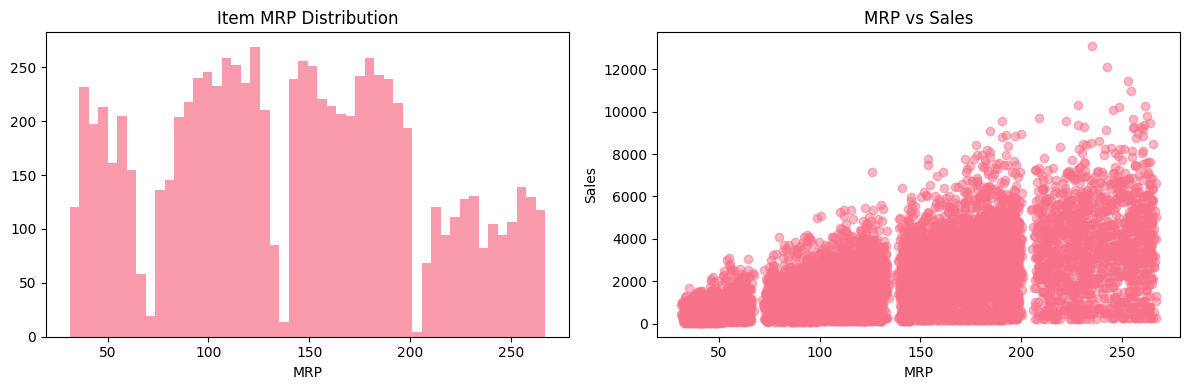


MRP-Sales correlation: 0.5676


In [9]:
# MRP analysis
print("Item MRP statistics:")
print(train_data['Item_MRP'].describe())

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(train_data['Item_MRP'], bins=50, alpha=0.7)
plt.title('Item MRP Distribution')
plt.xlabel('MRP')

plt.subplot(1, 2, 2)
plt.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'], alpha=0.5)
plt.title('MRP vs Sales')
plt.xlabel('MRP')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

# Correlation
mrp_sales_corr = train_data['Item_MRP'].corr(train_data['Item_Outlet_Sales'])
print(f"\nMRP-Sales correlation: {mrp_sales_corr:.4f}")

In [10]:
# Outlet analysis
print("Outlet Type distribution:")
print(train_data['Outlet_Type'].value_counts())

print("\nOutlet Size distribution:")
print(train_data['Outlet_Size'].value_counts())

print("\nOutlet Location Type distribution:")
print(train_data['Outlet_Location_Type'].value_counts())

Outlet Type distribution:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

Outlet Size distribution:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet Location Type distribution:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Outlet performance (top 10):
                          mean  count          std
Outlet_Identifier                                 
OUT027             3694.038558    935  2127.760054
OUT035             2438.841866    930  1538.512533
OUT049             2348.354635    930  1513.289464
OUT017             2340.675263    926  1550.778025
OUT013             2298.995256    932  1533.531664
OUT046             2277.844267    930  1488.405631
OUT045             2192.384798    929  1462.399658
OUT018             1995.498739    928  1375.932889
OUT019              340.329723    528   249.979449
OUT010              339.351662    555   271.014855


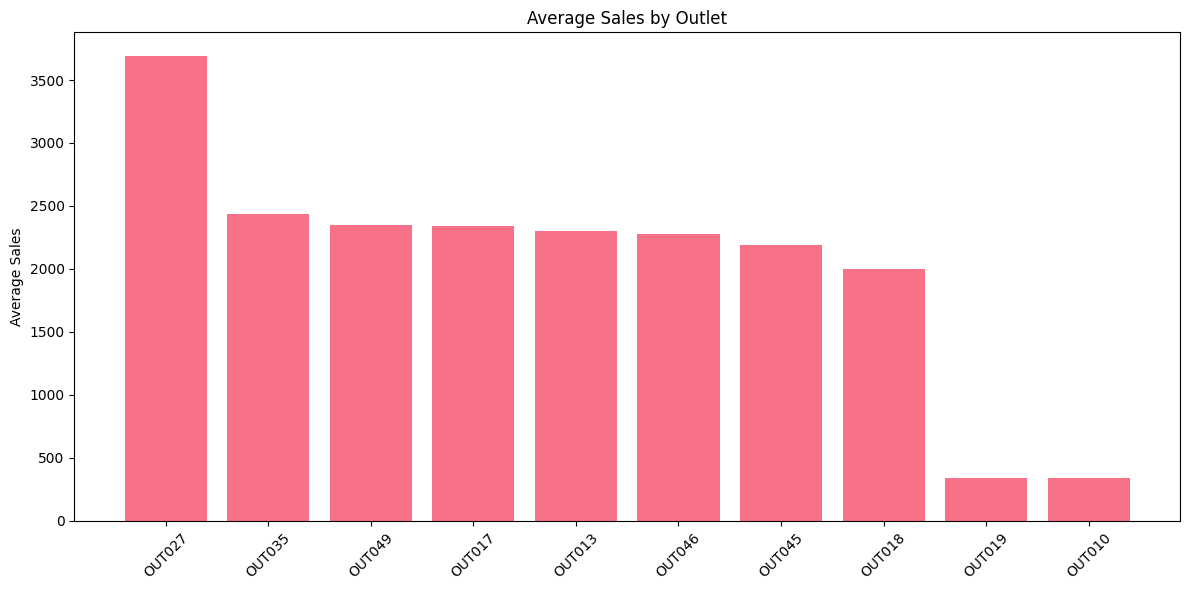

In [11]:
# Outlet performance analysis
outlet_performance = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean', 'count', 'std']).sort_values('mean', ascending=False)
print("Outlet performance (top 10):")
print(outlet_performance.head(10))

plt.figure(figsize=(12, 6))
plt.bar(range(len(outlet_performance)), outlet_performance['mean'])
plt.xticks(range(len(outlet_performance)), outlet_performance.index, rotation=45)
plt.title('Average Sales by Outlet')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

Outlet Establishment Year distribution:
Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: count, dtype: int64


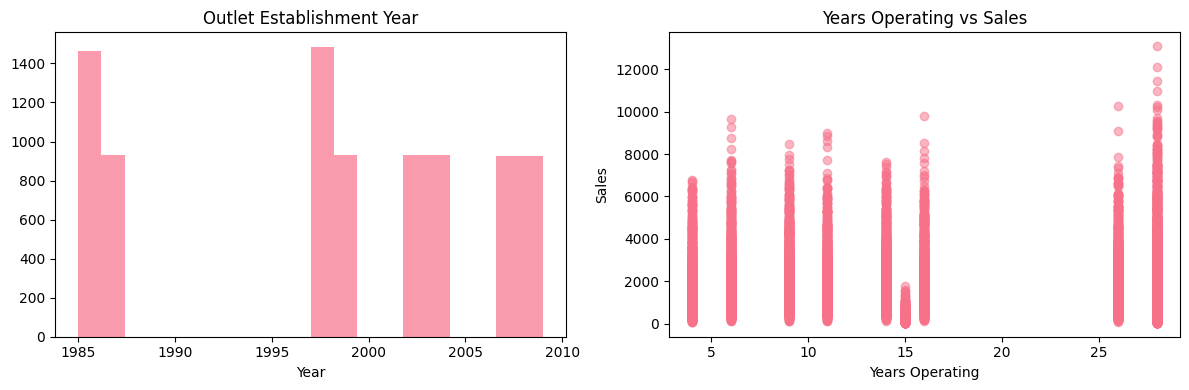


Years Operating-Sales correlation: 0.0491


In [12]:
# Outlet establishment year analysis
print("Outlet Establishment Year distribution:")
print(train_data['Outlet_Establishment_Year'].value_counts().sort_index())

# Calculate years of operation
train_data['Years_Operating'] = 2013 - train_data['Outlet_Establishment_Year']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(train_data['Outlet_Establishment_Year'], bins=20, alpha=0.7)
plt.title('Outlet Establishment Year')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
plt.scatter(train_data['Years_Operating'], train_data['Item_Outlet_Sales'], alpha=0.5)
plt.title('Years Operating vs Sales')
plt.xlabel('Years Operating')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

# Correlation
years_sales_corr = train_data['Years_Operating'].corr(train_data['Item_Outlet_Sales'])
print(f"\nYears Operating-Sales correlation: {years_sales_corr:.4f}")

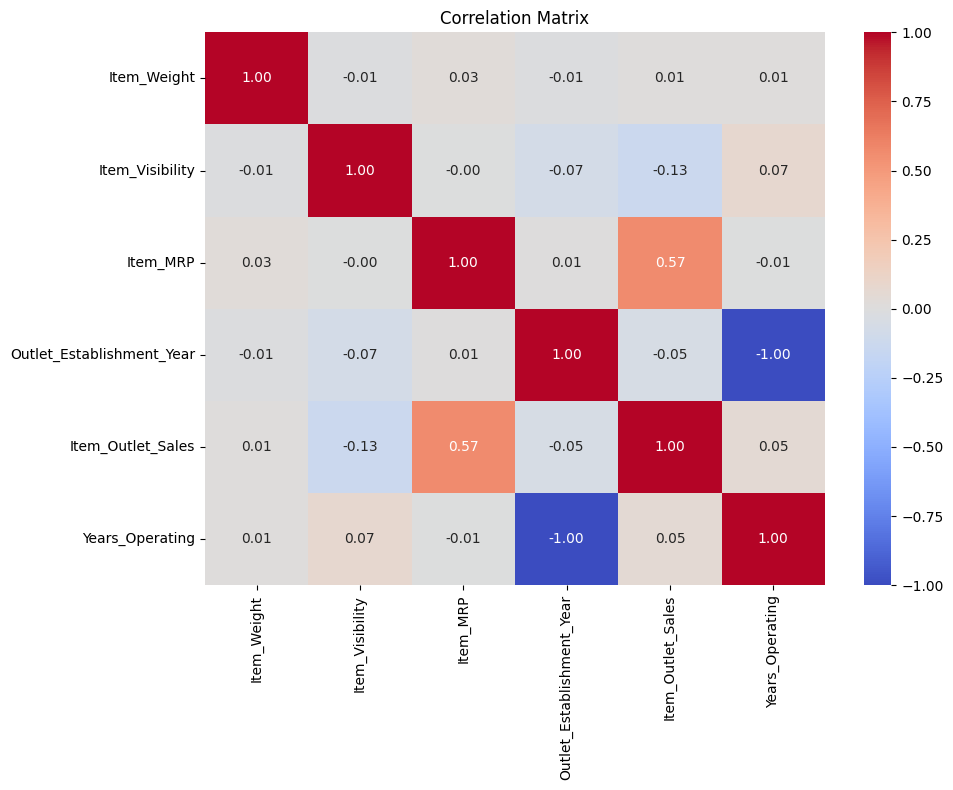

Correlations with Item_Outlet_Sales:
Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Years_Operating              0.049135
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


In [13]:
# Correlation matrix
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlations with Item_Outlet_Sales:")
sales_correlations = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False)
print(sales_correlations)

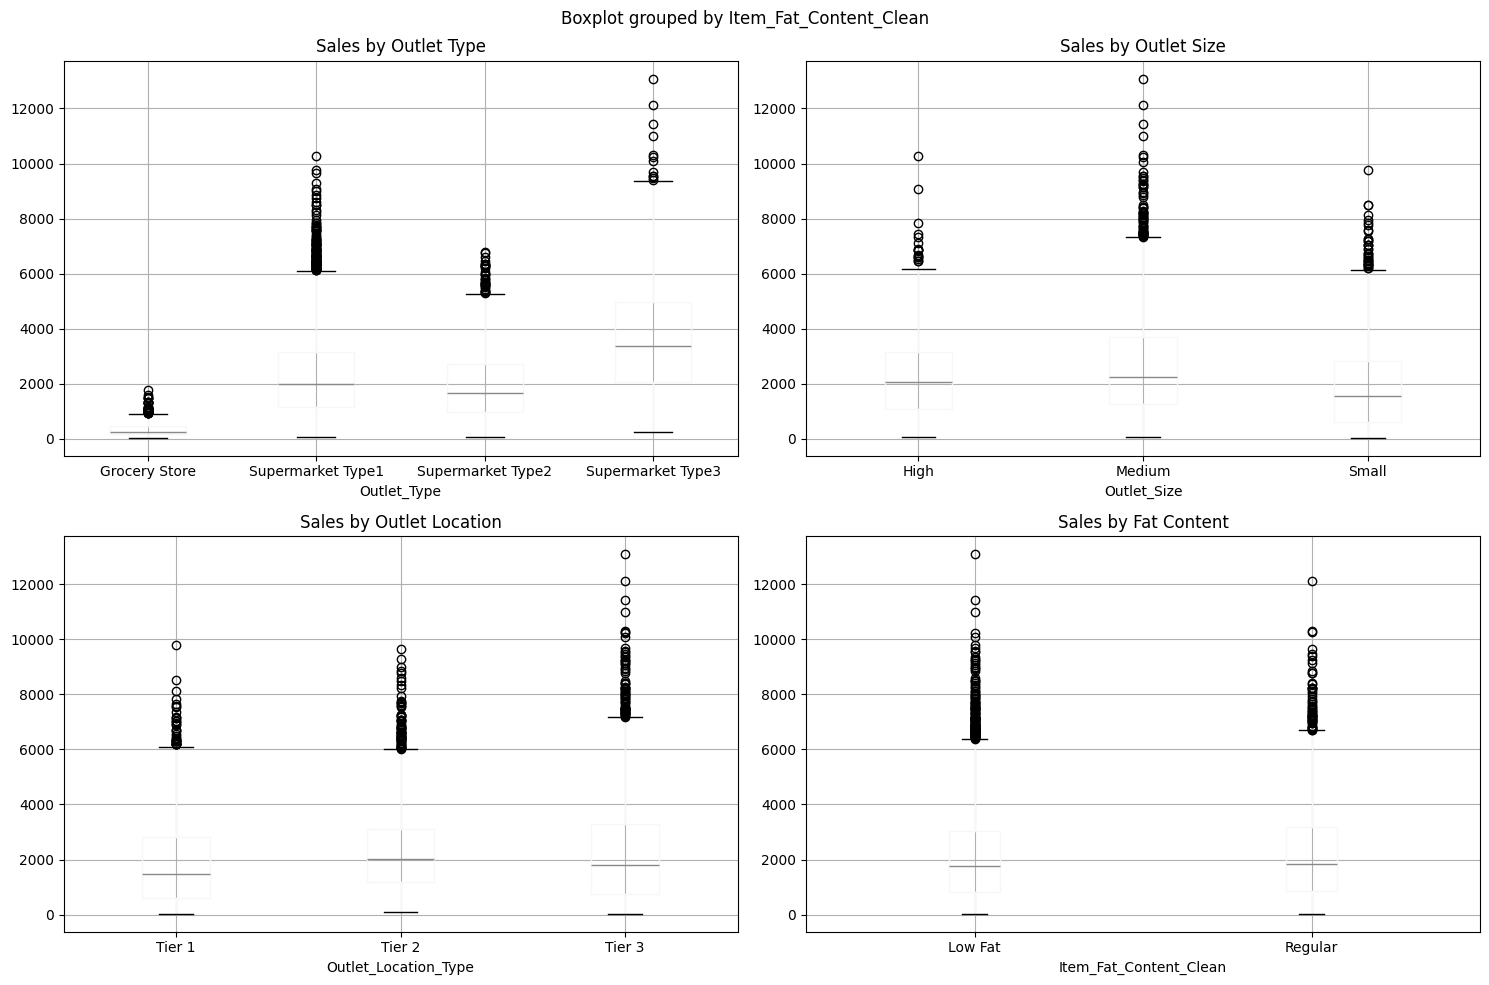

In [14]:
# Sales distribution by categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# By outlet type
train_data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', ax=axes[0,0])
axes[0,0].set_title('Sales by Outlet Type')

# By outlet size
train_data.boxplot(column='Item_Outlet_Sales', by='Outlet_Size', ax=axes[0,1])
axes[0,1].set_title('Sales by Outlet Size')

# By outlet location
train_data.boxplot(column='Item_Outlet_Sales', by='Outlet_Location_Type', ax=axes[1,0])
axes[1,0].set_title('Sales by Outlet Location')

# By fat content
train_data.boxplot(column='Item_Outlet_Sales', by='Item_Fat_Content_Clean', ax=axes[1,1])
axes[1,1].set_title('Sales by Fat Content')

plt.tight_layout()
plt.show()

In [16]:

print("Summary:")

print(f"Training records: {len(train_data):,}")
print(f"Test records: {len(test_data):,}")
print(f"Total features: {len(train_data.columns)-1}")

print("\nMissing data issues:")
print(f"- Item_Weight: {train_data['Item_Weight'].isnull().sum()} missing ({train_data['Item_Weight'].isnull().sum()/len(train_data)*100:.1f}%)")
print(f"- Outlet_Size: {train_data['Outlet_Size'].isnull().sum()} missing ({train_data['Outlet_Size'].isnull().sum()/len(train_data)*100:.1f}%)")

print("\nData inconsistencies:")
print(f"- Fat content inconsistent values: {len(train_data['Item_Fat_Content'].unique())} unique values")
print(f"- Zero visibility items: {(train_data['Item_Visibility'] == 0).sum()} items")

print("\nKey insights:")
print(f"- Sales range: ${train_data['Item_Outlet_Sales'].min():.2f} - ${train_data['Item_Outlet_Sales'].max():.2f}")
print(f"- Average sales: ${train_data['Item_Outlet_Sales'].mean():.2f}")
print(f"- Unique outlets: {train_data['Outlet_Identifier'].nunique()}")
print(f"- Unique items: {train_data['Item_Identifier'].nunique()}")
print(f"- Item types: {train_data['Item_Type'].nunique()}")

Summary:
Training records: 8,523
Test records: 5,681
Total features: 13

Missing data issues:
- Item_Weight: 1463 missing (17.2%)
- Outlet_Size: 2410 missing (28.3%)

Data inconsistencies:
- Fat content inconsistent values: 5 unique values
- Zero visibility items: 526 items

Key insights:
- Sales range: $33.29 - $13086.96
- Average sales: $2181.29
- Unique outlets: 10
- Unique items: 1559
- Item types: 16
